In [2]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import norm

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Read data downloded from KIVA.ORG 

In [4]:
#reading CSV file
loan = pd.read_csv(r'C:\Users\PAAV\Documents\Chethan\University of North Texas\Fall 2022\DSCI 5260 Business Process Analytics\kiva\python\kiva_ds_csv\loans.csv')

In [5]:
#reading CSV file
lenders = pd.read_csv(r'C:\Users\PAAV\Documents\Chethan\University of North Texas\Fall 2022\DSCI 5260 Business Process Analytics\kiva\python\kiva_ds_csv\lenders.csv')

In [6]:
#reading CSV file
loans_lenders = pd.read_csv(r'C:\Users\PAAV\Documents\Chethan\University of North Texas\Fall 2022\DSCI 5260 Business Process Analytics\kiva\python\kiva_ds_csv\loans_lenders.csv')

### Data Reading

Display the information about each dataframe.

In [7]:
# information of loan dataframe including shape & top 5 records
loan.shape # df has 2.1 million records and has 34 columns
loan.info() 
loan.head()

(2187118, 34)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187118 entries, 0 to 2187117
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,304819,Estrella De Luz Group,Spanish,"Este grupo se llama ""Estrella de luz"" está ubi...",This group is called “Estrella de Luz” (Star o...,2600.0,2600.0,funded,785529.0,NaN,...,6.0,6,1,1,NaN,"MARISOL, ANGELICA, EVA, JUANA, ISABEL, MARIA P...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner
1,1361590,Grace,English,"Grace is an honest, humble, and hard-working p...","Grace is an honest, humble, and hard-working p...",600.0,600.0,funded,2614927.0,NaN,...,20.0,21,2,1,"#Parent, #Woman-Owned Business",Grace,female,true,monthly,field_partner
2,1776536,Ligaya,English,Ligaya is a hardworking micro-entrepreneur.<br...,Ligaya is a hardworking micro-entrepreneur.<br...,200.0,200.0,funded,3173512.0,NaN,...,13.0,8,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya,female,true,monthly,field_partner
3,213423,Phorn Vann's Group,English,"Mrs. Phorn V., who is 61 years old, is the gro...",NaN,650.0,650.0,funded,565776.0,NaN,...,14.0,19,1,1,NaN,"Phorn, Bunthorn, Moeurn, Mi, Yim","female, male, female, female, female","true, true, true, true, true",bullet,field_partner
4,410154,Grace,English,Grace is 55 years old and married with 4 child...,NaN,625.0,625.0,funded,1059131.0,NaN,...,14.0,17,1,1,NaN,Grace,female,true,monthly,field_partner


In [8]:
# information of lenders dataframe including shape & top 5 records
lenders.shape # df has 1.5 million records and has 14 columns
lenders.info()
lenders.head()

(1578001, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578001 entries, 0 to 1578000
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1578001 non-null  object 
 1   DISPLAY_NAME       1576397 non-null  object 
 2   MAIN_PIC_ID        517496 non-null   float64
 3   CITY               545427 non-null   object 
 4   STATE              510145 non-null   object 
 5   COUNTRY_CODE       667827 non-null   object 
 6   MEMBER_SINCE       1578001 non-null  int64  
 7   PERSONAL_URL       48898 non-null    object 
 8   OCCUPATION         337415 non-null   object 
 9   LOAN_BECAUSE       152708 non-null   object 
 10  OTHER_INFO         87991 non-null    object 
 11  LOAN_PURCHASE_NUM  1578001 non-null  int64  
 12  INVITED_BY         416298 non-null   object 
 13  NUM_INVITED        1578001 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 168.5+ MB


,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,diana9725,Diana,NaN,NaN,NaN,NaN,1586181517,NaN,NaN,NaN,NaN,9,Jane,0
1,tommy42116366,Tommy,NaN,NaN,NaN,NaN,1604236678,NaN,NaN,NaN,NaN,1,NaN,0
2,vivian43273840,Vivian,NaN,NaN,NaN,NaN,1557390592,NaN,NaN,NaN,NaN,3,NaN,0
3,chandler1007,Chandler,NaN,NaN,NaN,NaN,1586187508,NaN,NaN,NaN,NaN,1,NaN,0
4,izabella8993,IZABELLA,NaN,NaN,NaN,NaN,1557372579,NaN,NaN,NaN,NaN,1,NaN,0


In [9]:
# information of loans_lenders dataframe including shape & top 5 records
loans_lenders.shape # has 2 columns
loans_lenders.info()
loans_lenders.head()

(2129036, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129036 entries, 0 to 2129035
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   LOAN_ID  int64 
 1   LENDERS  object
dtypes: int64(1), object(1)
memory usage: 32.5+ MB


,LOAN_ID,LENDERS
0,467550,"bill3435, olek, krista5896, adam8481, krisztin..."
1,305206,"andrew55406, sidledes, ronni1479, david5071, d..."
2,156996,"erin4898, dustin5617, nfolkert, pete3386, rich..."
3,188825,"luke7335, gwenevere2845, gwenevere2845, amy438..."
4,162051,"sbpc5426, crilla, carol2285, alice4556, jeff31..."


In [10]:
# The names of columns (variables) for all 3 dataframes
loan.columns
lenders.columns
loans_lenders.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

Index(['PERMANENT_NAME', 'DISPLAY_NAME', 'MAIN_PIC_ID', 'CITY', 'STATE',
       'COUNTRY_CODE', 'MEMBER_SINCE', 'PERSONAL_URL', 'OCCUPATION',
       'LOAN_BECAUSE', 'OTHER_INFO', 'LOAN_PURCHASE_NUM', 'INVITED_BY',
       'NUM_INVITED'],
      dtype='object')

Index(['LOAN_ID', 'LENDERS'], dtype='object')

### Data Preparation & Exploratory Analysis

We have used fundamental data imputing process for null records by using statistical methods such as mean, mode etc. 
Also, Target Variable category in Column 'STATUS' were transformed to 'Funded" and 'Not Funded'.

We also examined the variable levels  & roles. Amend them as required.
Set Loan Status to TARGET and as Binary Level.( “0” or “1” )

Use Stat Explore & Graph Explore to visualize & examine statistical parameters. 

Removing outliers using 3IQR in LOAN_AMOUNT & transforming loan amount using Log to normalise the variation

Create new variables to meausre the loan timelines to measure any loans disbursed before posting time.


In [11]:
# identify whether there are missing values in loan dataframe & summarising the missing values
loan.isnull()
loan.isnull().sum() #summarising the missing values
loan.isnull().any() # shows columns with missing values or not

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187113,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2187114,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2187115,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2187116,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


LOAN_ID                                  0
LOAN_NAME                            50389
ORIGINAL_LANGUAGE                    46040
DESCRIPTION                          46269
DESCRIPTION_TRANSLATED              455655
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             46040
VIDEO_ID                           2185897
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             46063
COUNTRY_CODE                            36
COUNTRY_NAME                             0
TOWN_NAME                           179089
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     527609
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4274
RAISED_TIME

LOAN_ID                            False
LOAN_NAME                           True
ORIGINAL_LANGUAGE                   True
DESCRIPTION                         True
DESCRIPTION_TRANSLATED              True
FUNDED_AMOUNT                      False
LOAN_AMOUNT                        False
STATUS                             False
IMAGE_ID                            True
VIDEO_ID                            True
ACTIVITY_NAME                      False
SECTOR_NAME                        False
LOAN_USE                            True
COUNTRY_CODE                        True
COUNTRY_NAME                       False
TOWN_NAME                           True
CURRENCY_POLICY                    False
CURRENCY_EXCHANGE_COVERAGE_RATE     True
CURRENCY                           False
PARTNER_ID                         False
POSTED_TIME                        False
PLANNED_EXPIRATION_TIME             True
DISBURSE_TIME                       True
RAISED_TIME                         True
LENDER_TERM     

We check the dependent variable 'STATUS' in the loans dataframe. How many unique values?

In [12]:
#checking dependent varialble for unique values
status_unique = loan['STATUS'].unique()
status_unique
status_unique.size

array(['funded', 'expired', 'refunded', 'fundRaising'], dtype=object)

4

No of observations for each category of 'STATUS'

In [13]:
#counting number of records for each category in STATUS variable.
loan.groupby('STATUS').agg({'LOAN_ID': ['count']}) # summarising no of observations in each category using agg function

loan['STATUS'].value_counts()# summarising no of observations in each category using value_counts()

,LOAN_ID
,count
STATUS,
expired,93435
fundRaising,5810
funded,2078544
refunded,9329


funded         2078544
expired          93435
refunded          9329
fundRaising       5810
Name: STATUS, dtype: int64

Our purpose is to build a model that predicts whether a loan can get funded based on loan features. So, which suggests the loan is funded? Which not? Which should we ignore?<br>
1) Delete the records with the category we can ignore.<br>
2) Recode the three categories to two categories (funded, notfunded)<br>
The recoded variable will be our target variable.

In [14]:
#6.1 the records with the category we can ignore i.e fundRaising category which is not useful for our prediction
loan.drop(loan[loan['STATUS'] == 'fundRaising'].index, inplace = True)
loan.groupby('STATUS').count()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
STATUS,,,,,,,,,,,,,,,,,,,,,
expired,93435,93026,93416,93286,87506,93435,93435,93416,166,93435,...,93433,93435,93435,93435,82146,93026,93416,93416,93435,93435
funded,2078544,2037893,2041852,2041753,1638147,2078544,2078544,2041852,1050,2078544,...,2078522,2078544,2078544,2078544,1122227,2037893,2041852,2041852,2078544,2078544
refunded,9329,0,0,0,0,9329,9329,0,0,9329,...,9329,9329,9329,9329,3525,0,0,0,9329,9329


In [15]:
#6.2 Recode the three categories to two categories (funded, notfunded)
loan["STATUS"].replace({"expired": "notfunded", "refunded": "notfunded"}, inplace=True)
loan.groupby('STATUS').agg({'LOAN_ID': ['count']})

,LOAN_ID
,count
STATUS,
funded,2078544
notfunded,102764


In [16]:
loan["STATUS"].replace({"funded": 1, "notfunded": 0}, inplace=True)

In [17]:
loan['STATUS'].value_counts()

1    2078544
0     102764
Name: STATUS, dtype: int64

Examine the variable 'LOAN_AMOUNT'. <br>
1) Check the distribution. What is the value of outliers if we use 3*IQR to define? <br>
2) Remove the outliers. <br>
3) Create a new variable by taking log of this variable.

{'whiskers': [<matplotlib.lines.Line2D at 0x172a42111f0>,
 'caps': [<matplotlib.lines.Line2D at 0x172a4211850>,
 'boxes': [<matplotlib.lines.Line2D at 0x172a3d83d60>],
 'medians': [<matplotlib.lines.Line2D at 0x172a4211f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x172a421b340>],
 'means': []}

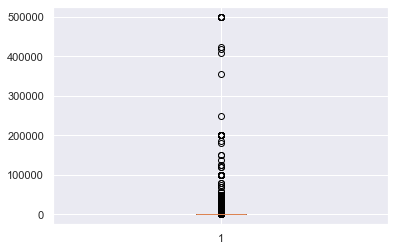

In [18]:
#7.1 Checking the distribution of the variable using boxplot & describe funtion
import matplotlib.pyplot as plt
plt.boxplot(loan['LOAN_AMOUNT'])
plt.show()

In [19]:
loan['LOAN_AMOUNT'].describe()
# SD is very high due to wide spread in loan amount & hence outliers as seen in boxplot

count    2.181308e+06
mean     8.114910e+02
std      1.672586e+03
min      2.500000e+01
25%      2.750000e+02
50%      5.000000e+02
75%      9.500000e+02
max      5.000000e+05
Name: LOAN_AMOUNT, dtype: float64

In [20]:
def outlier_removal(dataframe, column_name):
    q1 = dataframe[column_name].quantile(0.25)
    print("q1 is :",q1)
    q3 = dataframe[column_name].quantile(0.75)
    print("q3 is :",q3)
    inter_quantile_range = q3-q1
    print("inter_quantile_range, q3 - q1 is :",inter_quantile_range)
    outlier_low  = q1-3*inter_quantile_range
    outlier_high = q3+3*inter_quantile_range
    print("outlier_low is :",outlier_low)
    print("outlier_high is :",outlier_high)
    new_dataframe = dataframe.loc[(dataframe[column_name] 
                                   > outlier_low) & 
                                  (dataframe[column_name] 
                                   < outlier_high)]
    return new_dataframe

In [21]:
#7.2 removing outliers
loan = outlier_removal(loan, 'LOAN_AMOUNT')

q1 is : 275.0
q3 is : 950.0
inter_quantile_range, q3 - q1 is : 675.0
outlier_low is : -1750.0
outlier_high is : 2975.0


{'whiskers': [<matplotlib.lines.Line2D at 0x172a5327fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x172a53375e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x172a5327c10>],
 'medians': [<matplotlib.lines.Line2D at 0x172a5337d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x172a53430d0>],
 'means': []}

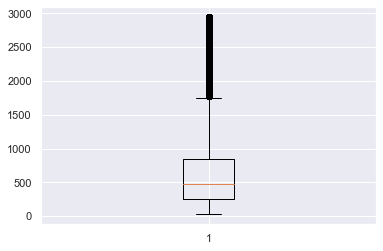

In [22]:
# Afetr removal of outliers
plt.boxplot(loan['LOAN_AMOUNT'])
plt.show()

In [23]:
# Afetr removal of outliers
loan.shape
loan['LOAN_AMOUNT'].describe()

(2091199, 34)

count    2.091199e+06
mean     6.343121e+02
std      5.252713e+02
min      2.500000e+01
25%      2.500000e+02
50%      4.750000e+02
75%      8.500000e+02
max      2.950000e+03
Name: LOAN_AMOUNT, dtype: float64

In [24]:
#Create a new variable by taking log of this variable to normalise the high variation in the dataset by taking log
loan['LOG_LOAN_AMOUNT'] =np.log(loan['LOAN_AMOUNT'])
loan['LOG_LOAN_AMOUNT'].head()

0    7.863267
1    6.396930
2    5.298317
3    6.476972
4    6.437752
Name: LOG_LOAN_AMOUNT, dtype: float64

 Imputing the missing value in country code with country name

In [25]:
#identifying missing calues in 2 variables specified above
loan.columns
loan.isnull().sum()
loan.isnull().any(axis = 0)

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT'],
      dtype='object')

LOAN_ID                                  0
LOAN_NAME                            48339
ORIGINAL_LANGUAGE                    44282
DESCRIPTION                          44354
DESCRIPTION_TRANSLATED              442109
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             44282
VIDEO_ID                           2090743
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             44299
COUNTRY_CODE                             1
COUNTRY_NAME                             0
TOWN_NAME                           163459
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     495605
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             362152
DISBURSE_TIME                         1586
RAISED_TIME

LOAN_ID                            False
LOAN_NAME                           True
ORIGINAL_LANGUAGE                   True
DESCRIPTION                         True
DESCRIPTION_TRANSLATED              True
FUNDED_AMOUNT                      False
LOAN_AMOUNT                        False
STATUS                             False
IMAGE_ID                            True
VIDEO_ID                            True
ACTIVITY_NAME                      False
SECTOR_NAME                        False
LOAN_USE                            True
COUNTRY_CODE                        True
COUNTRY_NAME                       False
TOWN_NAME                           True
CURRENCY_POLICY                    False
CURRENCY_EXCHANGE_COVERAGE_RATE     True
CURRENCY                           False
PARTNER_ID                         False
POSTED_TIME                        False
PLANNED_EXPIRATION_TIME             True
DISBURSE_TIME                       True
RAISED_TIME                         True
LENDER_TERM     

In [26]:
# since the missing value in country code is only one, we may need to check the country name & impute country code
loan[loan['COUNTRY_CODE'].isna()]['COUNTRY_NAME']

689808    Namibia
Name: COUNTRY_NAME, dtype: object

In [27]:
# checking country code of Namibia
loan[loan['COUNTRY_NAME']=='Namibia']['COUNTRY_CODE']

689808    NaN
Name: COUNTRY_CODE, dtype: object

In [28]:
# checking country code & country name
loan[['COUNTRY_CODE','COUNTRY_NAME']]

,COUNTRY_CODE,COUNTRY_NAME
0,MX,Mexico
1,KE,Kenya
2,PH,Philippines
3,KH,Cambodia
4,KE,Kenya
...,...,...
2187113,GT,Guatemala
2187114,NG,Nigeria
2187115,KE,Kenya
2187116,PH,Philippines


In [29]:
# imputing country code for missing value
loan[loan['COUNTRY_CODE']=='NM']['COUNTRY_NAME']


Series([], Name: COUNTRY_NAME, dtype: object)

In [30]:
loan['COUNTRY_CODE'] = loan['COUNTRY_CODE'].fillna('NM')
loan[loan['COUNTRY_CODE']=='NM']['COUNTRY_NAME']

689808    Namibia
Name: COUNTRY_NAME, dtype: object

### Data Transformation


Loan amount & Funded amount has high variation in data set & has outliers. Hence we used mathematical transformation to normalize the variation.(Log Transformation)<br>
Find the number of missing values in variables 'IMAGE_ID', 'VIDEO_ID' 'LOAN_USE' & Currecny exchange rate. <br>

Transform Image_ID into binary variable by assing '1'and'0' for image availability Yes or No.<br>
 
Impute missing values of Loan use by sector name as appropriate<br>
 
Impute missing values of Currecny exchange rate by '0'<br>
 
We read the policies on Kiva about exchange coverage. For instance, a lender gives 25 in US dollars and it changes to 250 in another currency. But when the money is repaid at 250 in the other currency, it only exchanges to 20 US dollars. The CURRENCY_EXCHANGE_COVERAGE_RATE measures how much such loss will be covered by the field partners. Some would cover 10% or 20%. So, it is more likely that the missing values indicating the loan does not have any coverage. So, it's more likely means 0.<br>
Replace the missing value with 0.


In [31]:
# finding the number of missing values in variables 'IMAGE_ID', 'VIDEO_ID' and 'LOAN_USE' & summarising the numbers
loan['IMAGE_ID'].isnull().sum()
loan['VIDEO_ID'].isnull().sum()
loan['LOAN_USE'].isnull().sum()


44282

2090743

44299

In [32]:
# imputing 0 & 1 for Image_ID 

loan['IMAGE_ID'] = loan['IMAGE_ID'].apply(lambda x: 1 if x >= 0 else 0)
loan['IMAGE_ID'].unique()

array([1, 0], dtype=int64)

In [33]:
# checking relationship between SECTOR_NAME  & LOAN_USE variables
loan[loan['LOAN_USE']==loan['SECTOR_NAME']].count()
loan['SECTOR_NAME'].isnull().sum()
loan[loan['LOAN_USE'].isna()]['SECTOR_NAME'].isna().any()

LOAN_ID                            60
LOAN_NAME                          60
ORIGINAL_LANGUAGE                  60
DESCRIPTION                        60
DESCRIPTION_TRANSLATED             36
FUNDED_AMOUNT                      60
LOAN_AMOUNT                        60
STATUS                             60
IMAGE_ID                           60
VIDEO_ID                            0
ACTIVITY_NAME                      60
SECTOR_NAME                        60
LOAN_USE                           60
COUNTRY_CODE                       60
COUNTRY_NAME                       60
TOWN_NAME                          59
CURRENCY_POLICY                    60
CURRENCY_EXCHANGE_COVERAGE_RATE     4
CURRENCY                           60
PARTNER_ID                         60
POSTED_TIME                        60
PLANNED_EXPIRATION_TIME             0
DISBURSE_TIME                      60
RAISED_TIME                        60
LENDER_TERM                        60
NUM_LENDERS_TOTAL                  60
NUM_JOURNAL_

0

False

In [34]:
#imputing missing values of LOAN_USE variable with sector name as it is related & we see around 60 values in the LOAN_USE va
loan.LOAN_USE.fillna(loan.SECTOR_NAME, inplace=True)
loan[loan['LOAN_USE']==loan['SECTOR_NAME']].count()

LOAN_ID                            44359
LOAN_NAME                             77
ORIGINAL_LANGUAGE                     77
DESCRIPTION                           71
DESCRIPTION_TRANSLATED                45
FUNDED_AMOUNT                      44359
LOAN_AMOUNT                        44359
STATUS                             44359
IMAGE_ID                           44359
VIDEO_ID                               0
ACTIVITY_NAME                      44359
SECTOR_NAME                        44359
LOAN_USE                           44359
COUNTRY_CODE                       44359
COUNTRY_NAME                       44359
TOWN_NAME                             74
CURRENCY_POLICY                    44359
CURRENCY_EXCHANGE_COVERAGE_RATE    33835
CURRENCY                           44359
PARTNER_ID                         44359
POSTED_TIME                        44359
PLANNED_EXPIRATION_TIME            29896
DISBURSE_TIME                      43961
RAISED_TIME                        41831
LENDER_TERM     

In [35]:
# Finally droping the other variable VIDEO_ID as the is null number is high & seems to be not helpful as of now
loan.drop('VIDEO_ID', axis = 1, inplace = True)
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,ACTIVITY_NAME,...,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LOG_LOAN_AMOUNT
0,304819,Estrella De Luz Group,Spanish,"Este grupo se llama ""Estrella de luz"" está ubi...",This group is called “Estrella de Luz” (Star o...,2600.0,2600.0,1,1,Retail,...,6,1,1,NaN,"MARISOL, ANGELICA, EVA, JUANA, ISABEL, MARIA P...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner,7.863267
1,1361590,Grace,English,"Grace is an honest, humble, and hard-working p...","Grace is an honest, humble, and hard-working p...",600.0,600.0,1,1,Farming,...,21,2,1,"#Parent, #Woman-Owned Business",Grace,female,true,monthly,field_partner,6.396930
2,1776536,Ligaya,English,Ligaya is a hardworking micro-entrepreneur.<br...,Ligaya is a hardworking micro-entrepreneur.<br...,200.0,200.0,1,1,Personal Housing Expenses,...,8,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya,female,true,monthly,field_partner,5.298317
3,213423,Phorn Vann's Group,English,"Mrs. Phorn V., who is 61 years old, is the gro...",NaN,650.0,650.0,1,1,Farming,...,19,1,1,NaN,"Phorn, Bunthorn, Moeurn, Mi, Yim","female, male, female, female, female","true, true, true, true, true",bullet,field_partner,6.476972
4,410154,Grace,English,Grace is 55 years old and married with 4 child...,NaN,625.0,625.0,1,1,Dairy,...,17,1,1,NaN,Grace,female,true,monthly,field_partner,6.437752


In [36]:
# unique values for CURRENCY_EXCHANGE_COVERAGE_RATE variable & sum
loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique()

loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].isnull().sum()

array([nan, 0.1, 0.2, 0. ])

495605

In [37]:
# as advised , imputing missing values to 0. However, we also see currency policy, which says curr as shared or standard. 
# noted that all the missing values are of category standard. it means there was no risk sharing with the field partners
loan.CURRENCY_EXCHANGE_COVERAGE_RATE.fillna(0, inplace=True)
loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].isnull().sum()

0

### FInally, dropping variables which are not required.
by understanding the data variables for example there are many more activities than sectors and Sector is higher-level categorization of loans. We can choose one of them. To keep the results easier to read. We can keep sector name.
'LOAN_NAME' seems irrelevant to whether a loan is funded. We have not learned how to process 'DESCRIPTION' and 'DESCRIPTION_TRANSLATED'. 'FUNDED_AMOUNT' is the amount that actually raised at the end. Most times it is the same as 'LOAN_AMOUNT'. <br>


After doing similar analysis with every variable, we decide to keep only the following variables in the final analysis: <br>

LOAN_ID<br>
ORIGINAL_LANGUAGE<br>
LOAN_AMOUNT (and the logAmount variable we created)<br>
STATUS<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
POSTED_TIME  (and the TIME_LENGTH we created)<br>
DISBURSE_TIME (and the PREDISBURSE we created)<br>
RAISED_TIME                        
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL 

In [38]:
loan['ACTIVITY_NAME'].unique()
loan['SECTOR_NAME'].unique()

array(['Retail', 'Farming', 'Personal Housing Expenses', 'Dairy',
       'Food Production/Sales', 'Fruits & Vegetables', 'Home Energy',
       'Clothing', 'General Store', 'Charcoal Sales', 'Textiles',
       'Home Appliances', 'Rickshaw', 'Fishing', 'Beauty Salon',
       'Services', 'Pigs', 'Home Products Sales', 'Grocery Store',
       'Bakery', 'Sewing', 'Tailoring', 'Construction', 'Food',
       'Construction Supplies', 'Cattle', 'Liquor Store / Off-License',
       'Animal Sales', 'Food Market', 'Crafts', 'Beverages',
       'Clothing Sales', 'Agriculture', 'Property', 'Cosmetics Sales',
       'Primary/secondary school costs', 'Fish Selling', 'Pub',
       'Higher education costs', 'Personal Medical Expenses',
       'Education provider', 'Motorcycle Transport', 'Livestock',
       'Cereals', 'Weaving', 'Goods Distribution', 'Electronics Sales',
       'Used Clothing', 'Taxi', 'Restaurant', 'Used Shoes', 'Poultry',
       'Energy', 'Mobile Transactions', 'Transportation', 'Fuel

array(['Retail', 'Agriculture', 'Housing', 'Food', 'Personal Use',
       'Clothing', 'Arts', 'Transportation', 'Services', 'Construction',
       'Education', 'Health', 'Wholesale', 'Manufacturing',
       'Entertainment'], dtype=object)

In [39]:
loan.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_CODE',
       'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT'],
      dtype='object')

In [40]:
Loan_final = loan.drop(['LOAN_NAME','DESCRIPTION','DESCRIPTION_TRANSLATED','CURRENCY', 'PARTNER_ID','FUNDED_AMOUNT','ACTIVITY_NAME','COUNTRY_CODE','TOWN_NAME','PLANNED_EXPIRATION_TIME','TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED'], axis=1)

In [41]:
Loan_final.columns

Index(['LOAN_ID', 'ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'IMAGE_ID',
       'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'POSTED_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT'],
      dtype='object')

### Data Exploaration using statistical graphs & Visualizing the distribution of a dataset

The agenda includes plotting key variables into histogram, scatter plot etc

array([[<AxesSubplot:title={'center':'LOAN_AMOUNT'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'LOG_LOAN_AMOUNT'}>]], dtype=object)

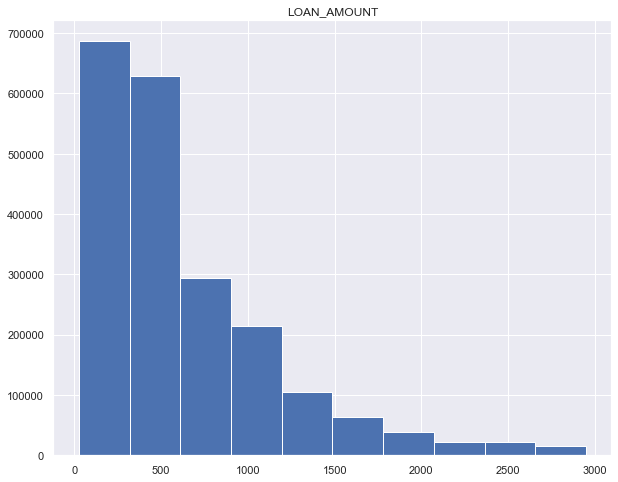

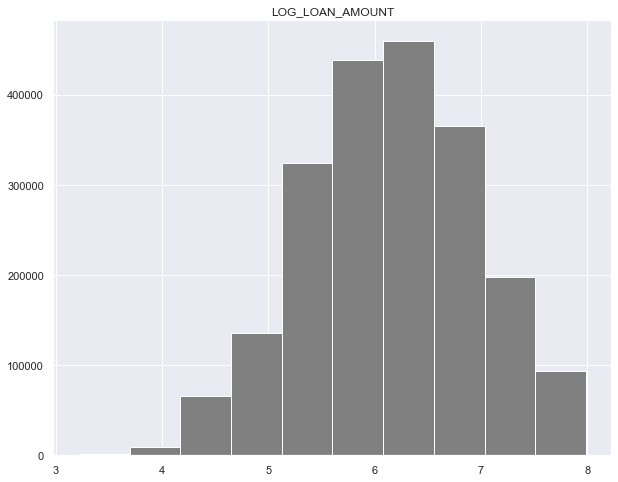

In [42]:
%matplotlib inline 
Loan_final.hist(column = 'LOAN_AMOUNT', figsize = (10,8))
Loan_final.hist(column = 'LOG_LOAN_AMOUNT', facecolor='grey', figsize = (10,8))
#the skewness in LOAN_AMOUNT was is optimeisd by transforming the variable using log. Log tends to normalise the variation in attributed of the variable.
# The second histogram shows fairly disributed 

### Plotting univariate distributions :
The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='LOG_LOAN_AMOUNT', ylabel='Density'>

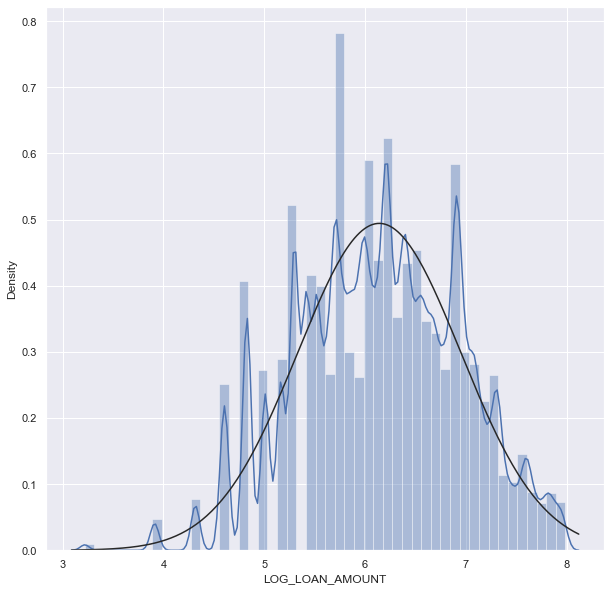

In [43]:
plt.figure(figsize = (10,10))
sns.distplot(Loan_final['LOG_LOAN_AMOUNT'],fit = norm)

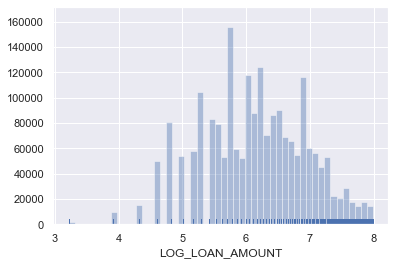

In [44]:
sns.distplot(Loan_final['LOG_LOAN_AMOUNT'], kde=False, rug=True);

#### Understanding the relationship between key interval variables to loan amount through pairgraphs

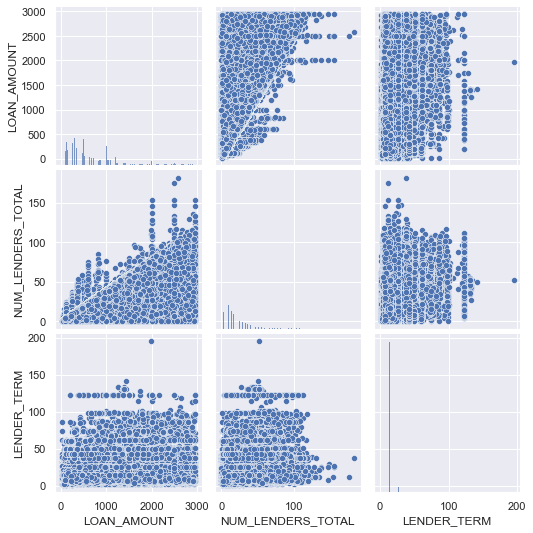

In [45]:
sns.pairplot(Loan_final[['LOAN_AMOUNT', 'NUM_LENDERS_TOTAL', 'DISTRIBUTION_MODEL','LENDER_TERM']])

#### Creating a bar chart to answer our descriptive question : The total loan amount in each sector, each Country  

,LOAN_AMOUNT
,sum
SECTOR_NAME,
Agriculture,361811850.0
Arts,27365750.0
Clothing,79911950.0
Construction,19069675.0
Education,57978800.0
Entertainment,1882100.0
Food,274795275.0
Health,24435275.0


<AxesSubplot:xlabel='SECTOR_NAME'>

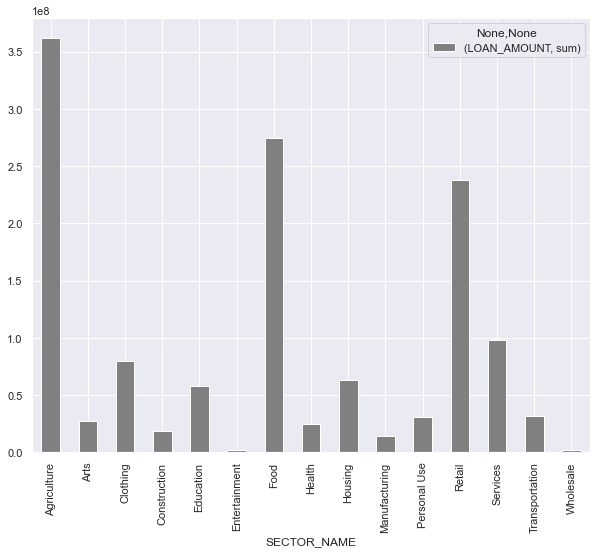

In [46]:
loan_amount = Loan_final.groupby('SECTOR_NAME').agg({'LOAN_AMOUNT': ['sum']})

loan_amount

# A bar chart
loan_amount.plot(kind = 'bar',facecolor='grey', figsize = (10,8))

<Figure size 2520x1080 with 0 Axes>

<AxesSubplot:xlabel='SECTOR_NAME', ylabel='count'>

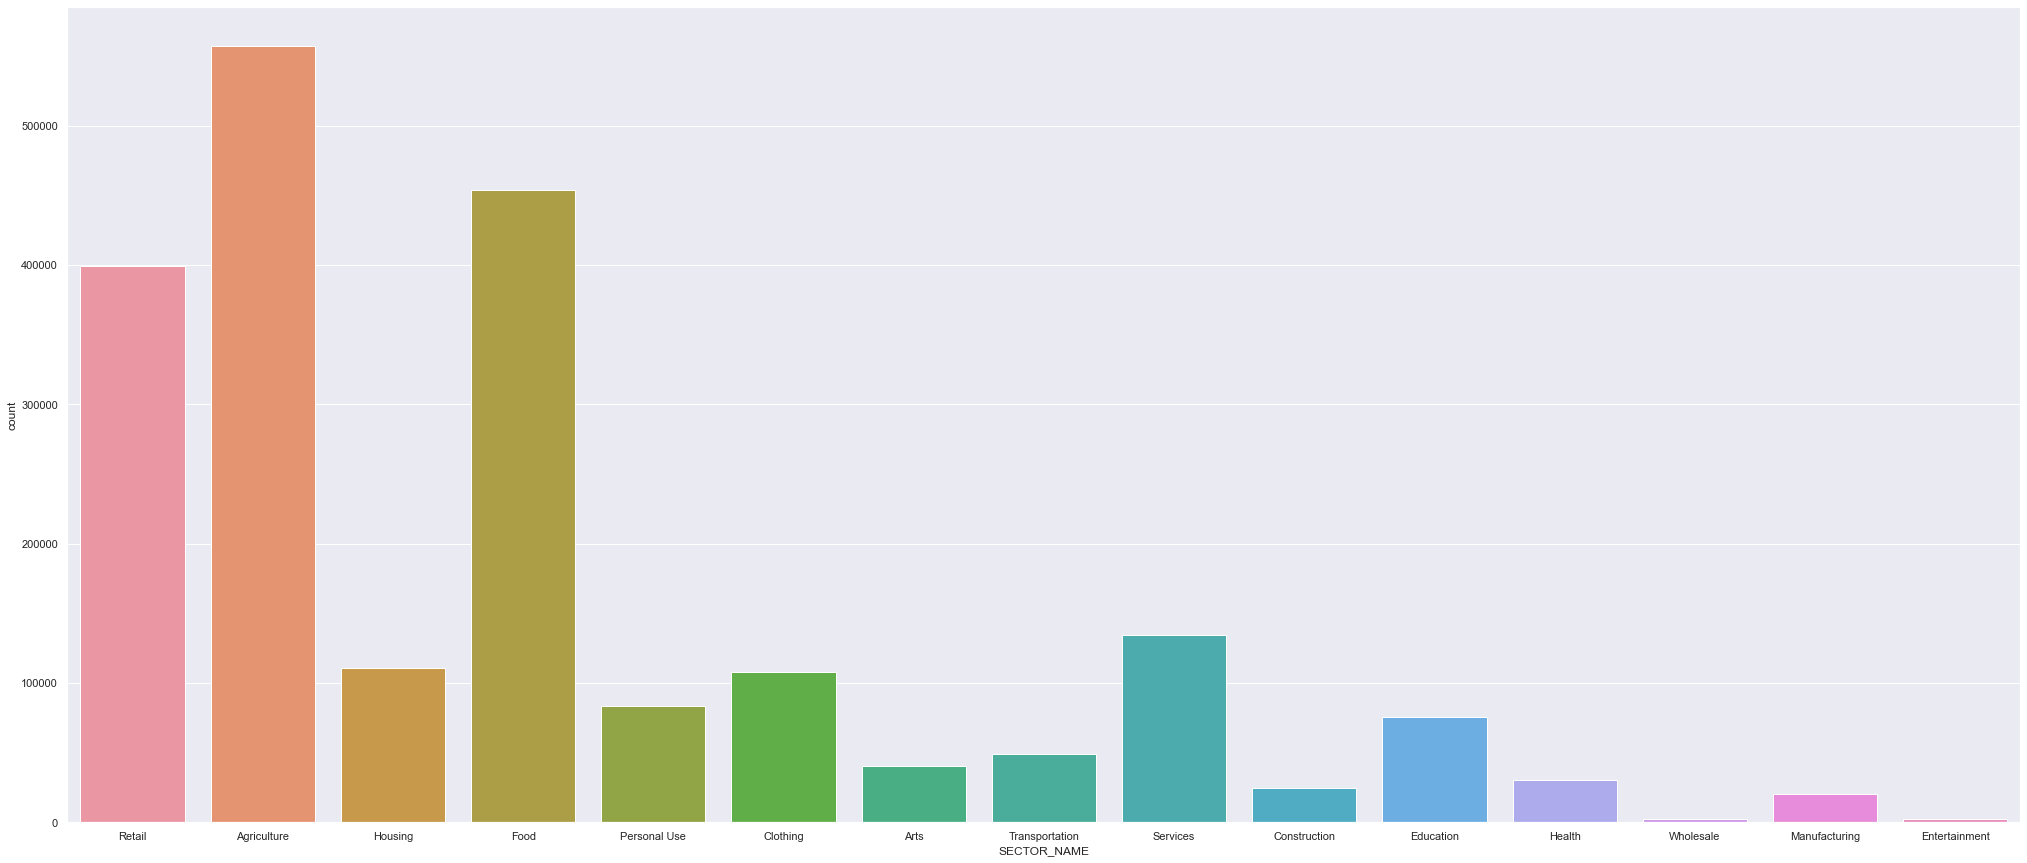

In [47]:
plt.figure(figsize = (35,15))
sns.countplot(Loan_final['SECTOR_NAME'])

####  A bar chart to demonstrate the total number of loans in each country

,LOAN_ID
,count
COUNTRY_NAME,
Afghanistan,2335
Albania,5479
Armenia,14455
Azerbaijan,10150
Belize,217
...,...
Vanuatu,505
Vietnam,33498


<AxesSubplot:xlabel='COUNTRY_NAME'>

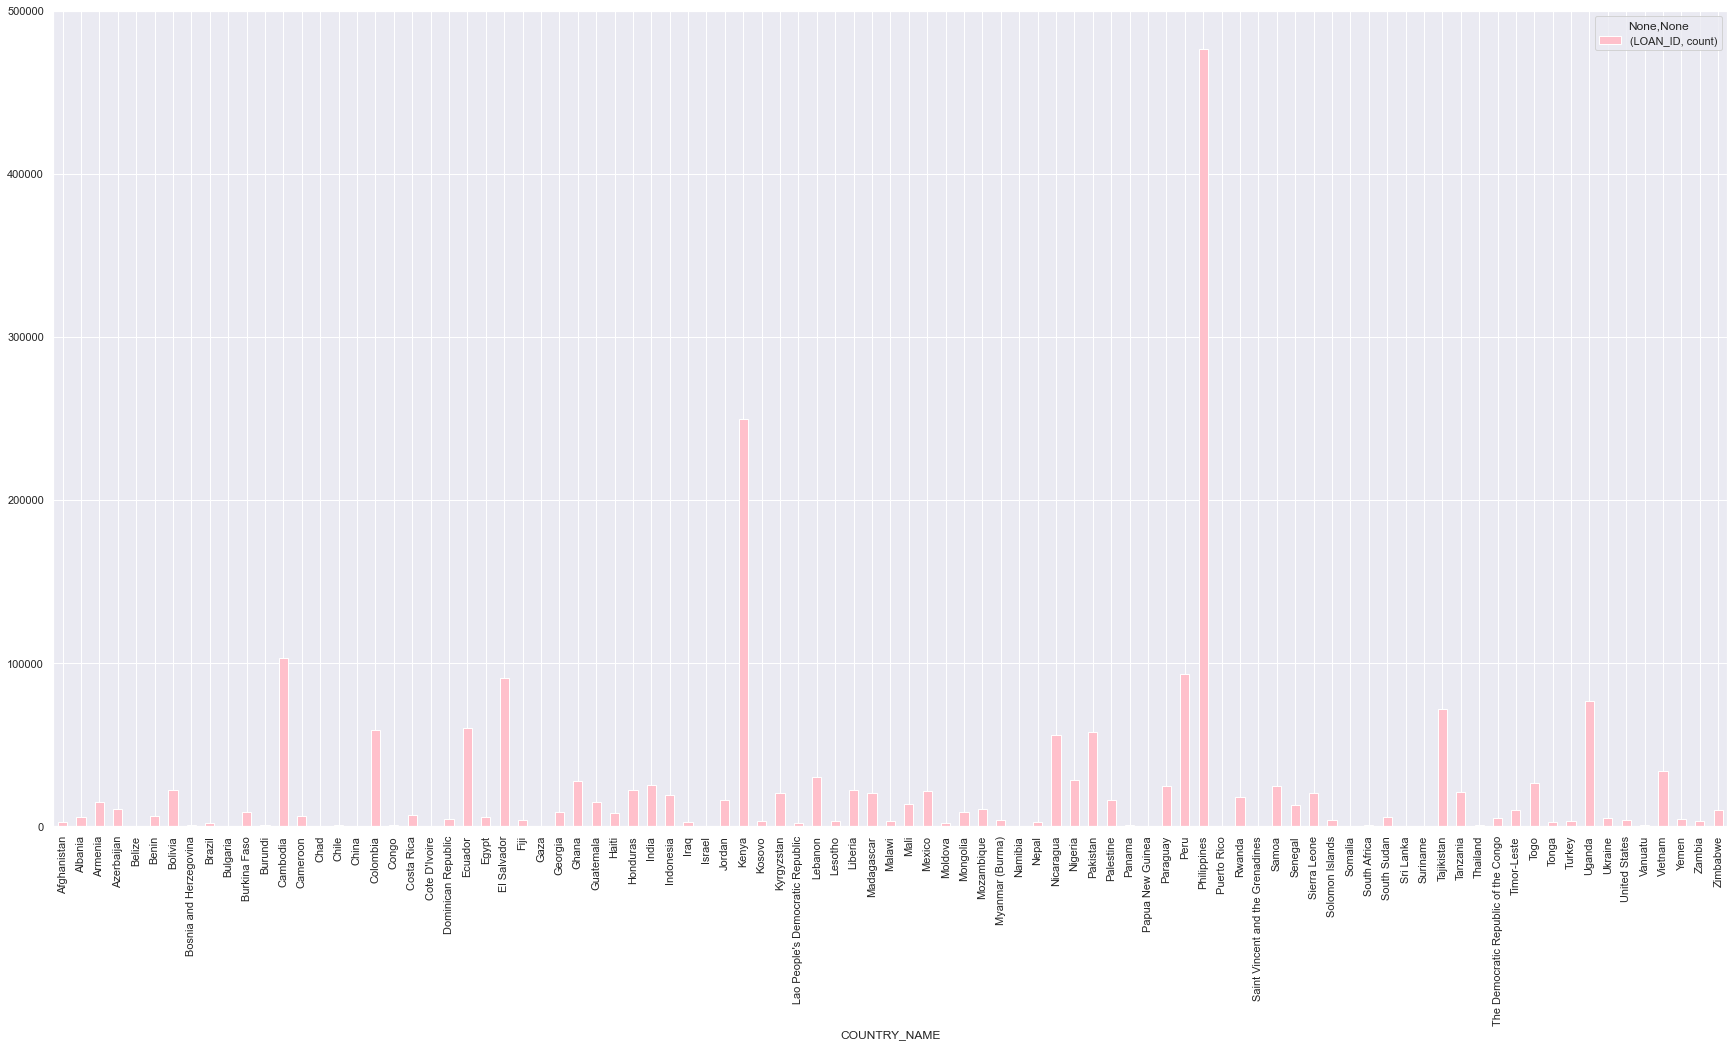

In [48]:
loan_countrywise = Loan_final.groupby('COUNTRY_NAME').agg({'LOAN_ID': ['count']})

loan_countrywise

# A bar chart
loan_countrywise.plot(kind = 'bar',facecolor='pink', figsize = (30,15))

<AxesSubplot:>

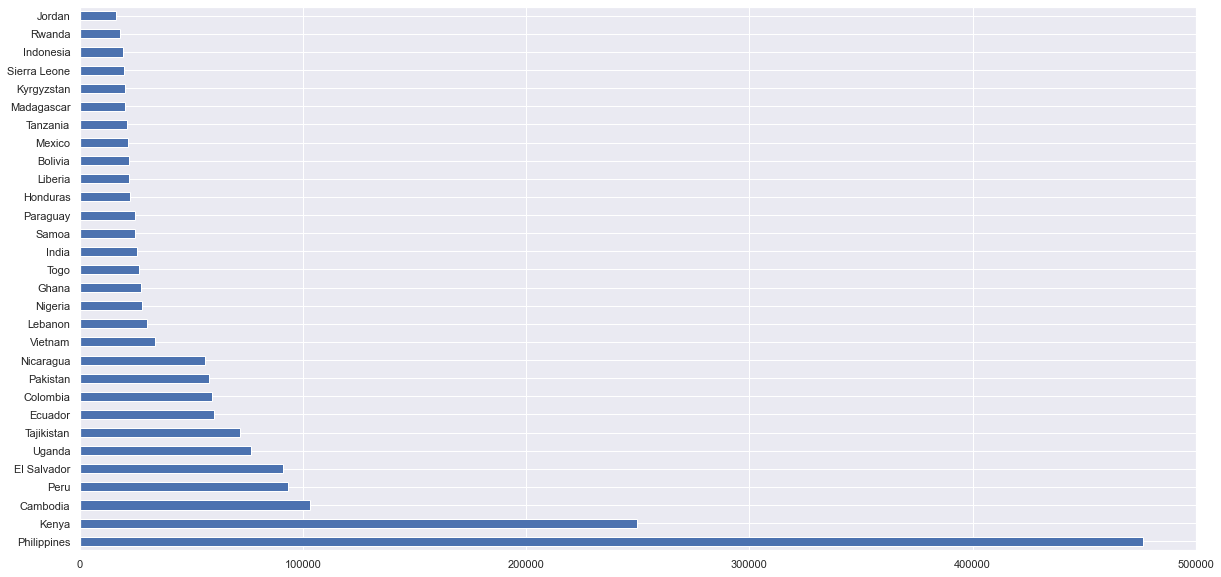

In [49]:
Loan_final['COUNTRY_NAME'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

### A line graph to demonstrate total numbe of loans each year 

Text(0.5, 0, 'Year')

Text(0, 0.5, 'No_of_loans')

Text(0.5, 1.0, 'Total number of loans in each yea')

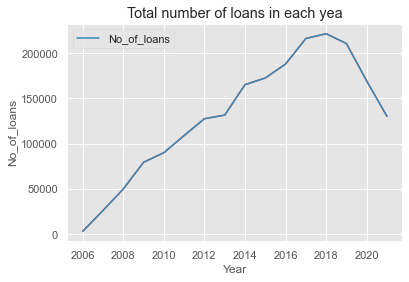

In [50]:
Loan_final['YEAR'] = pd.DatetimeIndex(Loan_final['POSTED_TIME']).year

No_of_loans = Loan_final.groupby('YEAR').agg({'LOAN_ID': ['count']})

plt.style.use('ggplot')
plt.plot(No_of_loans)
plt.plot(No_of_loans, label = 'No_of_loans')
plt.legend() # show the legend
plt.xlabel('Year')
plt.ylabel('No_of_loans')
plt.title('Total number of loans in each yea')


###  Create a pivot table to show the average loan amount in each sector each year.

In [51]:
Loan_final.groupby('YEAR')[['LOAN_AMOUNT']].mean()

,LOAN_AMOUNT
YEAR,
2006,678.781250
2007,628.385684
2008,677.447045
2009,631.759466
2010,680.300432
2011,713.236508
2012,729.940078
2013,728.300084
2014,676.556553


In [52]:
Loan_final.pivot_table('LOAN_AMOUNT',index='YEAR',columns='SECTOR_NAME')

SECTOR_NAME,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
YEAR,,,,,,,,,,,,,,,
2006,677.455919,765.441176,622.483221,784.405941,NaN,603.571429,647.490157,809.722222,497.619048,876.190476,NaN,662.877698,736.238532,935.795455,NaN
2007,657.880235,556.600877,646.504950,730.501618,794.642857,531.250000,595.012937,714.716312,787.557078,616.530612,NaN,623.515683,647.101310,692.133132,645.185185
2008,684.617722,592.685893,681.646895,723.112892,725.274725,681.770833,645.601048,768.494624,631.327160,726.793558,746.153846,691.047674,705.678233,713.596774,775.104603
2009,622.929046,602.074167,705.984697,725.808538,666.281139,681.500000,593.716926,714.194009,608.928571,668.694779,637.200599,617.183807,744.207067,635.345156,801.396648
2010,676.886867,736.235038,808.771853,748.578554,674.962121,636.285714,645.552294,764.544808,631.899763,743.929110,697.666025,648.876992,764.573335,672.727933,779.938272
2011,719.999610,744.811106,809.789304,806.945177,751.921182,801.954733,640.352926,761.039360,744.293478,824.703626,736.412688,697.290399,800.728460,740.689698,888.250000
2012,763.815987,819.075777,803.782915,815.173649,859.822185,762.500000,647.228025,787.141217,849.365606,843.151554,787.178412,678.283034,825.065935,698.559437,942.625000
2013,783.656150,705.714286,778.017466,832.622774,857.643714,812.931034,641.984904,912.354167,858.525513,803.423849,723.334632,656.375606,782.580433,729.856608,1096.262887
2014,709.230414,725.151253,725.531682,796.949489,796.262741,859.566327,639.875592,948.925593,660.587687,731.741097,529.541793,617.004033,746.397032,601.993099,1122.959184


### Create a scatterplot of 'LOAN_AMOUNT' and 'LENDER_TERM'. 

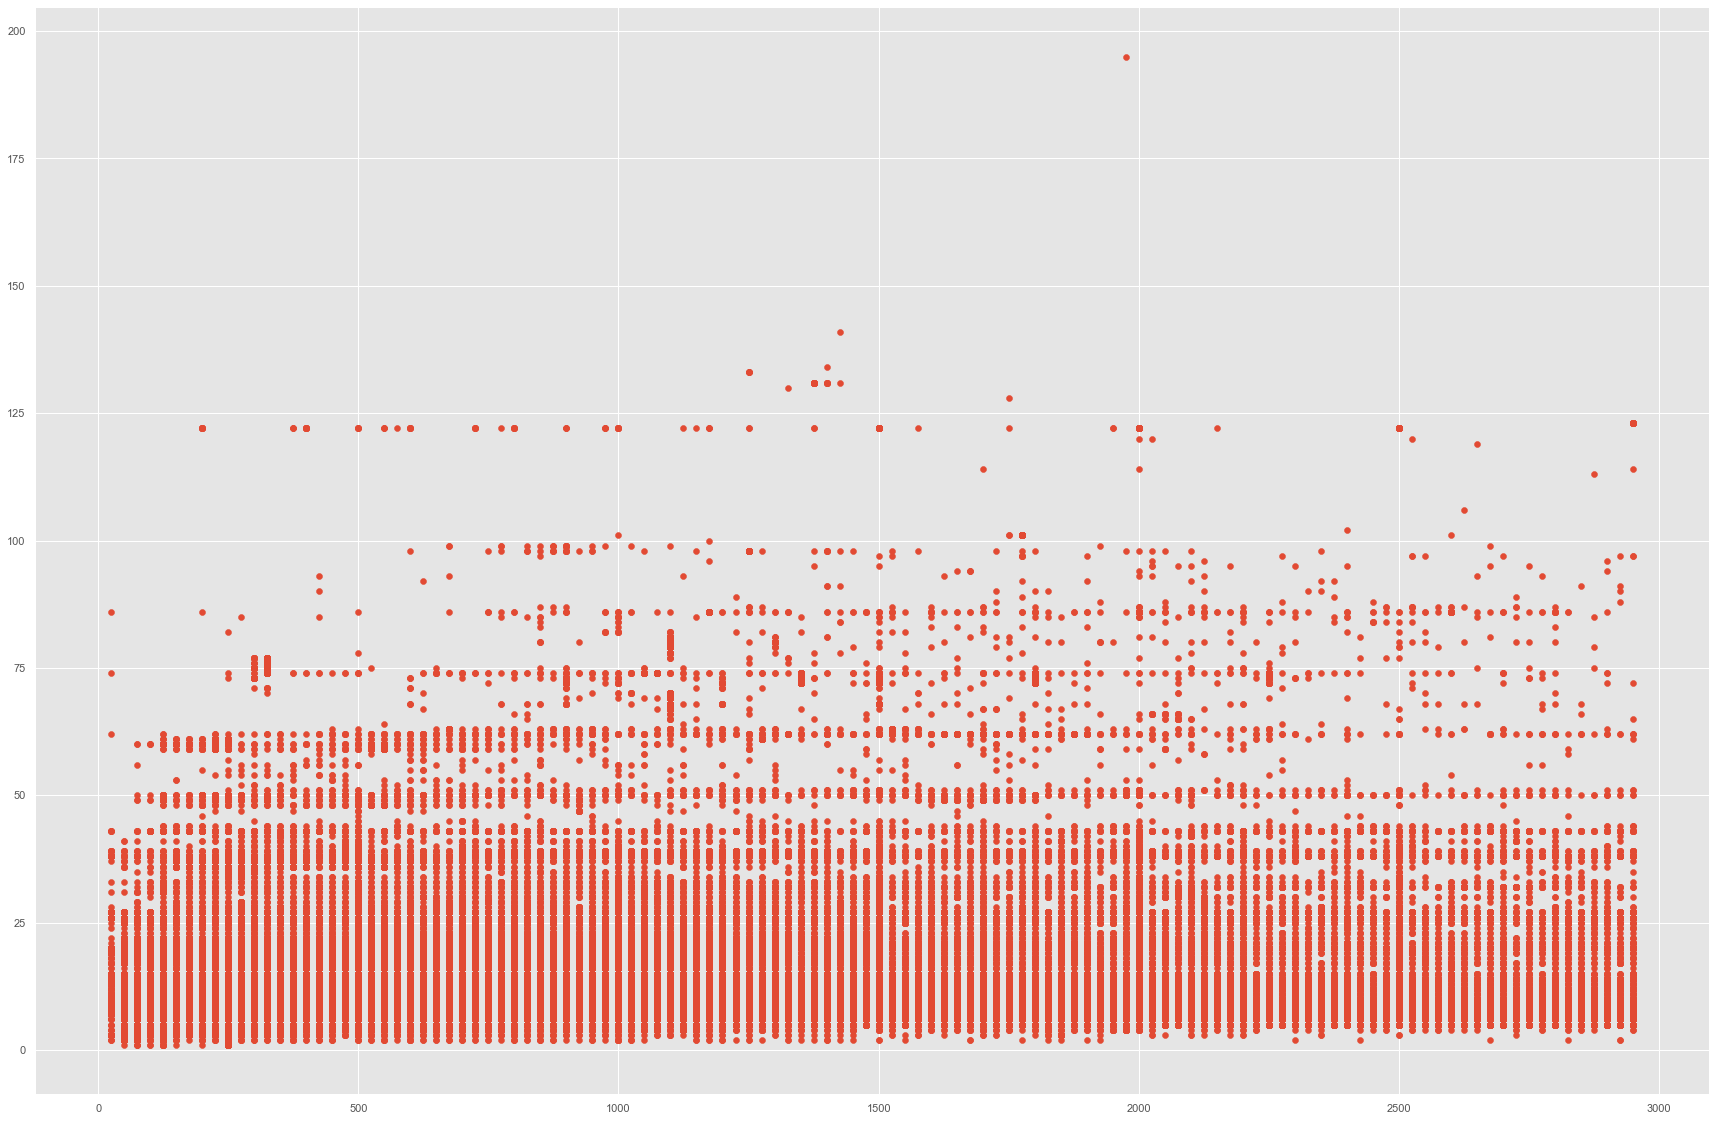

In [53]:
X=Loan_final['LOAN_AMOUNT']
Y=Loan_final['LENDER_TERM']
fig, ax = plt.subplots(figsize=(30, 20))
ax.scatter(X,Y)

#There is no correlation between these two variables

##  Model analysis. 

The target variable is 'STATUS'. The predictor variables we want to include:<br>
ORIGINAL_LANGUAGE<br>
the logAmount variable we created<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
Days we creatd based on the TIME_LENGTH <br>
PREDISBURSE we created<br>
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL<br>
Now we can drop all records with missing values at this point.

In [54]:
Loan_final.head()
Loan_final.isnull().any() # shows columns with missing values or not
df_final_loans = Loan_final.drop(['DISBURSE_TIME','RAISED_TIME'], axis = 1)
df_final_loans.info()
df_final_loans.isnull().sum()

,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,IMAGE_ID,SECTOR_NAME,LOAN_USE,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,...,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LOG_LOAN_AMOUNT,YEAR
0,304819,Spanish,2600.0,1,1,Retail,"to invest in merchandise like snacks, sweets a...",Mexico,standard,0.0,...,2011-05-31 07:00:00.000 +0000,2011-06-14 03:36:16.000 +0000,6.0,6,1,1,monthly,field_partner,7.863267,2011
1,1361590,English,600.0,1,1,Agriculture,to buy farm inputs.,Kenya,shared,0.1,...,2017-08-18 07:00:00.000 +0000,2017-09-25 21:04:45.000 +0000,20.0,21,2,1,monthly,field_partner,6.396930,2017
2,1776536,English,200.0,1,1,Housing,to build a sanitary toilet for her family.,Philippines,shared,0.1,...,2019-06-05 07:00:00.000 +0000,2019-06-21 01:29:14.000 +0000,13.0,8,2,1,monthly,field_partner,5.298317,2019
3,213423,English,650.0,1,1,Agriculture,To buy fertilizer,Cambodia,shared,0.2,...,2010-06-23 07:00:00.000 +0000,2010-08-11 15:30:45.000 +0000,14.0,19,1,1,bullet,field_partner,6.476972,2010
4,410154,English,625.0,1,1,Agriculture,To buy a dairy cow.,Kenya,shared,0.2,...,2012-03-02 08:00:00.000 +0000,2012-04-11 14:14:56.000 +0000,14.0,17,1,1,monthly,field_partner,6.437752,2012


LOAN_ID                            False
ORIGINAL_LANGUAGE                   True
LOAN_AMOUNT                        False
STATUS                             False
IMAGE_ID                           False
SECTOR_NAME                        False
LOAN_USE                           False
COUNTRY_NAME                       False
CURRENCY_POLICY                    False
CURRENCY_EXCHANGE_COVERAGE_RATE    False
POSTED_TIME                        False
DISBURSE_TIME                       True
RAISED_TIME                         True
LENDER_TERM                         True
NUM_LENDERS_TOTAL                  False
NUM_JOURNAL_ENTRIES                False
NUM_BULK_ENTRIES                   False
REPAYMENT_INTERVAL                 False
DISTRIBUTION_MODEL                 False
LOG_LOAN_AMOUNT                    False
YEAR                               False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091199 entries, 0 to 2187117
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   ORIGINAL_LANGUAGE                object 
 2   LOAN_AMOUNT                      float64
 3   STATUS                           int64  
 4   IMAGE_ID                         int64  
 5   SECTOR_NAME                      object 
 6   LOAN_USE                         object 
 7   COUNTRY_NAME                     object 
 8   CURRENCY_POLICY                  object 
 9   CURRENCY_EXCHANGE_COVERAGE_RATE  float64
 10  POSTED_TIME                      object 
 11  LENDER_TERM                      float64
 12  NUM_LENDERS_TOTAL                int64  
 13  NUM_JOURNAL_ENTRIES              int64  
 14  NUM_BULK_ENTRIES                 int64  
 15  REPAYMENT_INTERVAL               object 
 16  DISTRIBUTION_MODEL               object 
 17  LOG_LOAN

LOAN_ID                                0
ORIGINAL_LANGUAGE                  44282
LOAN_AMOUNT                            0
STATUS                                 0
IMAGE_ID                               0
SECTOR_NAME                            0
LOAN_USE                               0
COUNTRY_NAME                           0
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE        0
POSTED_TIME                            0
LENDER_TERM                           24
NUM_LENDERS_TOTAL                      0
NUM_JOURNAL_ENTRIES                    0
NUM_BULK_ENTRIES                       0
REPAYMENT_INTERVAL                     0
DISTRIBUTION_MODEL                     0
LOG_LOAN_AMOUNT                        0
YEAR                                   0
dtype: int64

In [55]:
df_final_loans['LENDER_TERM'] =  df_final_loans['LENDER_TERM'].fillna(df_final_loans['LENDER_TERM'].mean())
df_final_loans['LENDER_TERM'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2187113    False
2187114    False
2187115    False
2187116    False
2187117    False
Name: LENDER_TERM, Length: 2091199, dtype: bool

In [57]:
df_final_loans = df_final_loans.fillna(df_final_loans.mode().iloc[0])

In [58]:
df_final_loans.isnull().sum()

LOAN_ID                            0
ORIGINAL_LANGUAGE                  0
LOAN_AMOUNT                        0
STATUS                             0
IMAGE_ID                           0
SECTOR_NAME                        0
LOAN_USE                           0
COUNTRY_NAME                       0
CURRENCY_POLICY                    0
CURRENCY_EXCHANGE_COVERAGE_RATE    0
POSTED_TIME                        0
LENDER_TERM                        0
NUM_LENDERS_TOTAL                  0
NUM_JOURNAL_ENTRIES                0
NUM_BULK_ENTRIES                   0
REPAYMENT_INTERVAL                 0
DISTRIBUTION_MODEL                 0
LOG_LOAN_AMOUNT                    0
YEAR                               0
dtype: int64

### Model preparation

The agenda includes creating a dummy variables for categorical variables and dropping the first one.

In [59]:
# Creating a ummy variables for categorical variable and dropping the first one.
ol = pd.get_dummies(df_final_loans['ORIGINAL_LANGUAGE'],prefix='ORIGINAL_LANGUAGE',drop_first=True)
#Adding the results to the master dataframe
df_loans = pd.concat([df_final_loans,ol],axis=1)
#Sector_Name
sm = pd.get_dummies(df_final_loans['SECTOR_NAME'],prefix='SECTOR_NAME',drop_first=True)
df_loans = pd.concat([df_final_loans,sm],axis=1)
#Country_Name
cm = pd.get_dummies(df_final_loans['COUNTRY_NAME'],prefix='COUNTRY_NAME',drop_first=True)
df_loans = pd.concat([df_final_loans,cm],axis=1)

#CURRENCY_POLICY
cp = pd.get_dummies(df_final_loans['CURRENCY_POLICY'],prefix='CURRENCY_POLICY',drop_first=True)
df_loans = pd.concat([df_loans,cp],axis=1)

#REPAYMENT_INTERVAL
ri = pd.get_dummies(df_final_loans['REPAYMENT_INTERVAL'],prefix='REPAYMENT_INTERVAL',drop_first=True)
df_loans = pd.concat([df_final_loans,ri],axis=1)

#DISTRIBUTION_MODEL
dm = pd.get_dummies(df_final_loans['DISTRIBUTION_MODEL'],prefix='DISTRIBUTION_MODEL',drop_first=True)
df_loans = pd.concat([df_final_loans,dm],axis=1)

In [60]:
# We have created dummies for the below variables, so we can drop them
df_loans = df_final_loans.drop(['ORIGINAL_LANGUAGE','SECTOR_NAME','COUNTRY_NAME','CURRENCY_POLICY','REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'], 1)

In [61]:
#df_loans = pd.get_dummies(df_loans,columns = ["COUNTRY_NAME","ORIGINAL_LANGUAGE", "SECTOR_NAME", "COUNTRY_NAME", "CURRENCY_POLICY", "REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL"],drop_first=True)

In [62]:
df_final_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091199 entries, 0 to 2187117
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   ORIGINAL_LANGUAGE                object 
 2   LOAN_AMOUNT                      float64
 3   STATUS                           int64  
 4   IMAGE_ID                         int64  
 5   SECTOR_NAME                      object 
 6   LOAN_USE                         object 
 7   COUNTRY_NAME                     object 
 8   CURRENCY_POLICY                  object 
 9   CURRENCY_EXCHANGE_COVERAGE_RATE  float64
 10  POSTED_TIME                      object 
 11  LENDER_TERM                      float64
 12  NUM_LENDERS_TOTAL                int64  
 13  NUM_JOURNAL_ENTRIES              int64  
 14  NUM_BULK_ENTRIES                 int64  
 15  REPAYMENT_INTERVAL               object 
 16  DISTRIBUTION_MODEL               object 
 17  LOG_LOAN

## Modeling & Analysis:

Prepare training and test datasets by splitting data test into 70:30 randomly & creatting new variables 'X' & 'y" for train & test dataset as shqon below

In [64]:
X = df_final_loans[['LOG_LOAN_AMOUNT', 'IMAGE_ID','LENDER_TERM', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES', 
                ]]
y = df_final_loans['STATUS']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [66]:
y_test.unique()

array([1, 0], dtype=int64)

### Model 1 : Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(solver='lbfgs',multi_class='auto')
logsk.fit(X_train, y_train)


LogisticRegression()

### Get the predicted results for the test dataset

In [68]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)

In [69]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [70]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [71]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [72]:
# Putting LOAN_ID to index
y_test_df['LOAN_ID'] = y_test_df.index
y_test_df['LOAN_ID']

85837        85837
1278816    1278816
1589452    1589452
234984      234984
1759876    1759876
            ...   
1788447    1788447
424441      424441
1417029    1417029
1480669    1480669
1934822    1934822
Name: LOAN_ID, Length: 627360, dtype: int64

In [73]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [74]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [75]:
y_test_df.head()

,STATUS,LOAN_ID
0,1,85837
1,1,1278816
2,1,1589452
3,1,234984
4,1,1759876


In [76]:
y_pred_1.head()

,1
0,0.992192
1,0.998249
2,0.976566
3,0.995971
4,0.992313


In [77]:
y_pred_final.head()

,STATUS,LOAN_ID,1
0,1,85837,0.992192
1,1,1278816,0.998249
2,1,1589452,0.976566
3,1,234984,0.995971
4,1,1759876,0.992313


In [78]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'PRED_STATUS'})
y_pred_final.head()

,STATUS,LOAN_ID,PRED_STATUS
0,1,85837,0.992192
1,1,1278816,0.998249
2,1,1589452,0.976566
3,1,234984,0.995971
4,1,1759876,0.992313


In [79]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LOAN_ID','STATUS','PRED_STATUS'], axis=1)
y_pred_final.head()

,LOAN_ID,STATUS,PRED_STATUS
0,85837,1,0.992192
1,1278816,1,0.998249
2,1589452,1,0.976566
3,234984,1,0.995971
4,1759876,1,0.992313


In [80]:
# Creating new column 'predicted' with 1 if PRED_STATUS < 0.5 else 0
y_pred_final['PRED_STATUS'] = y_pred_final.PRED_STATUS.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,LOAN_ID,STATUS,PRED_STATUS
0,85837,1,1
1,1278816,1,1
2,1589452,1,1
3,234984,1,1
4,1759876,1,1


### Evaluate the model using accuracy rate and confusion matrix.

In [81]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final['STATUS'], y_pred_final['PRED_STATUS'] )
confusion

array([[  8129,  19835],
       [  5499, 593897]], dtype=int64)

<AxesSubplot:>

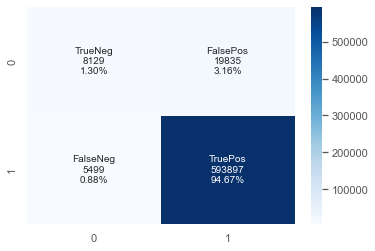

In [82]:
group_names = ['TrueNeg','FalsePos','FalseNeg','TruePos']
group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
          
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

In [83]:
y_pred_final['PRED_STATUS'].value_counts()

1    613732
0     13628
Name: PRED_STATUS, dtype: int64

In [84]:
#the overall accuracy.
accuracy_lr = metrics.accuracy_score(y_pred_final['STATUS'], y_pred_final['PRED_STATUS'] )
accuracy_lr

0.9596180821219077

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
sensitivity_lr = TP / float(TP+FN) # Sensitivity
specificity_lr = TN / float(TN+FP) # Specificity
print(sensitivity_lr)
print(specificity_lr)

0.9908257646030337
0.29069517951652124


## Model 2 : Random Forest

In [87]:
# Random Forest
#Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
# Making predictions
predictions = rfc.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64     27964
           1       0.98      0.99      0.98    599396

    accuracy                           0.97    627360
   macro avg       0.85      0.78      0.81    627360
weighted avg       0.97      0.97      0.97    627360



In [90]:
# Printing confusion matrix
confusion1 = confusion_matrix(y_test,predictions)
print(confusion1)

[[ 15894  12070]
 [  6118 593278]]


<AxesSubplot:>

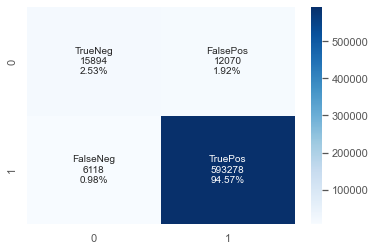

In [91]:
group_names = ['TrueNeg','FalsePos','FalseNeg','TruePos']
group_counts = ["{0:0.0f}".format(value) for value in confusion1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion1.flatten()/np.sum(confusion1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
          
sns.heatmap(confusion1, annot=labels, fmt='', cmap='Blues')

In [92]:
accuracy_rfc = accuracy_score(y_test,predictions)
accuracy_rfc

0.9710086712573324

In [93]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [94]:
sensitivity_rfc = TP / float(TP+FN) # Sensitivity
specificity_rfc = TN / float(TN+FP) # Specificity
print(sensitivity_rfc)
print(specificity_rfc)

0.989793058345401
0.568373623229867


# Model 3 :Decision tree

In [95]:
# Repeat this with DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
yT_pred = dtc.predict(X_test)

In [97]:
# Printing confusion matrix
confusion2 = confusion_matrix(y_test,yT_pred)
print(confusion2)

[[ 16282  11682]
 [  7606 591790]]


<AxesSubplot:>

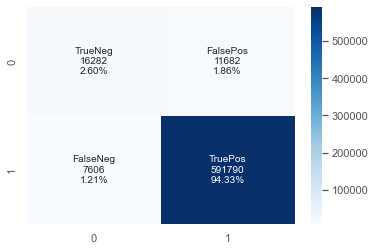

In [98]:
group_names = ['TrueNeg','FalsePos','FalseNeg','TruePos']
group_counts = ["{0:0.0f}".format(value) for value in confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
          
sns.heatmap(confusion2, annot=labels, fmt='', cmap='Blues')

In [99]:
# Calculate the accuracy rate
accuracy_dtc = accuracy_score(y_true = y_test, y_pred = yT_pred)
accuracy_dtc

0.9692552920173425

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
sensitivity_dtc = TP / float(TP+FN) # Sensitivity
specificity_dtc = TN / float(TN+FP) # Specificity
print(sensitivity_dtc)
print(specificity_dtc)

0.9873105592963584
0.5822486053497353


In [102]:
Model_accuracy =[accuracy_lr,accuracy_dtc,accuracy_rfc]

Model_accuracy
Model_Sensitivity =[sensitivity_lr, sensitivity_dtc, sensitivity_rfc]
Model_Sensitivity

[0.9596180821219077, 0.9692552920173425, 0.9710086712573324]

[0.9908257646030337, 0.9873105592963584, 0.989793058345401]

# Keras Neural Networks

In [125]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report



inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
36596/36596 [==============================] - 38s 1ms/step - loss: 0.0874 - accuracy: 0.9685 - val_loss: 0.0816 - val_accuracy: 0.9694
Epoch 2/100
36596/36596 [==============================] - 35s 948us/step - loss: 0.0799 - accuracy: 0.9702 - val_loss: 0.0920 - val_accuracy: 0.9667
Epoch 3/100
36596/36596 [==============================] - 35s 965us/step - loss: 0.0786 - accuracy: 0.9706 - val_loss: 0.0812 - val_accuracy: 0.9704: 0.97
Epoch 4/100
36596/36596 [==============================] - 35s 950us/step - loss: 0.0781 - accuracy: 0.9706 - val_loss: 0.0804 - val_accuracy: 0.9699
Epoch 5/100
36596/36596 [==============================] - 35s 954us/step - loss: 0.0776 - accuracy: 0.9707 - val_loss: 0.0768 - val_accuracy: 0.97110.07 - ETA: 24s - loss: 0.0784  - ETA: 23s - loss: 0.0786 - a - ETA: 23s - loss: 0.0788 - accuracy - ETA: 22s - loss: 0.0789 - accuracy: - ETA: 22s - loss: 0.0790 - accuracy: 0 - ETA: 19s - loss: 0.07 - ETA: 18s - loss: 0.0781 - ETA: 10s - loss: 0

In [1]:
_, accuracy = model.evaluate(X_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))

NameError: name 'model' is not defined

In [2]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

NameError: name 'model' is not defined

In [144]:
y_pred_bool

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [145]:
accuracy_nn = accuracy_score(y_true = y_test, y_pred = y_pred_bool)
accuracy_nn

0.9713529711808212

# Naive Bayes Classifiers

In [129]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

GaussianNB()

Gaussian Naive Bayes model accuracy(in %): 93.74171129813823


In [130]:
# Printing confusion matrix
confusion5 = confusion_matrix(y_test,y_pred)
print(confusion5)

[[ 15237  12727]
 [ 26535 572861]]


<AxesSubplot:>

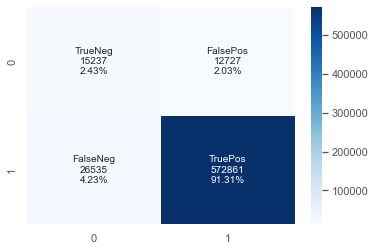

In [131]:
group_names = ['TrueNeg','FalsePos','FalseNeg','TruePos']
group_counts = ["{0:0.0f}".format(value) for value in confusion5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion5.flatten()/np.sum(confusion5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
          
sns.heatmap(confusion5, annot=labels, fmt='', cmap='Blues')

In [139]:
# Calculate the accuracy rate
accuracy_nbc = accuracy_score(y_true = y_test, y_pred = y_pred)
accuracy_nbc

0.9374171129813823

In [133]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [140]:
sensitivity_nbc = TP / float(TP+FN) # Sensitivity
specificity_nbc = TN / float(TN+FP) # Specificity
print(sensitivity_nbc)
print(specificity_nbc)

0.9557304353048736
0.544879130310399


In [146]:
Model_accuracy =[accuracy_lr,accuracy_dtc,accuracy_rfc,accuracy_nbc,accuracy_nn]

Model_accuracy
Model_Sensitivity =[sensitivity_lr, sensitivity_dtc, sensitivity_rfc, specificity_nbc]
Model_Sensitivity

[0.9596180821219077,
 0.9374171129813823,
 0.9710086712573324,
 0.9374171129813823,
 0.9713529711808212]

[0.9908257646030337, 0.9557304353048736, 0.989793058345401, 0.544879130310399]

## By Comparing Model Accuracies of 5 Models, we can conclude that neural network has better accuracy 97.13%,compared to Random Forest model 97.1 % compared to Logistic regression 95.9% & Decision tree 93.7% compared to Naive Bayes Classifiers 93.7% 

### Additonaly, we tried answering descriptive questions. 

Which Country has more number of loans & loans amount?

Gender using the loans?

,LOAN_AMOUNT
,sum
COUNTRY_NAME,
Afghanistan,1953950.0
Albania,7980525.0
Armenia,20390500.0
Azerbaijan,14679150.0
Belize,144725.0
...,...
Vanuatu,372075.0
Vietnam,33911750.0


<AxesSubplot:xlabel='COUNTRY_NAME'>

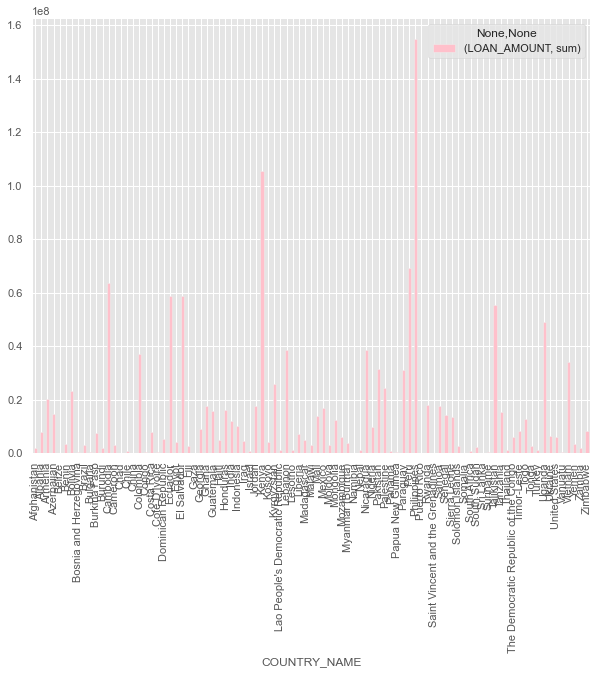

In [136]:
#Which Country has more number of loans & loans amount?
loan_countrywise = Loan_final.groupby('COUNTRY_NAME').agg({'LOAN_AMOUNT': ['sum']})

loan_countrywise

# A bar chart
loan_countrywise.plot(kind = 'bar',facecolor='pink', figsize = (10,8))

In [137]:
#Gender using the loans?
loan['NUM_BORROWERS'] = loan['BORROWER_GENDERS'].str.split(', ').str.len()
loan['PERCENT_FEMALE'] = loan['BORROWER_GENDERS'].str.count("female") / loan['NUM_BORROWERS']
women = round(loan['PERCENT_FEMALE'].mean()*100)
men = 100 - women
women
men


77

23

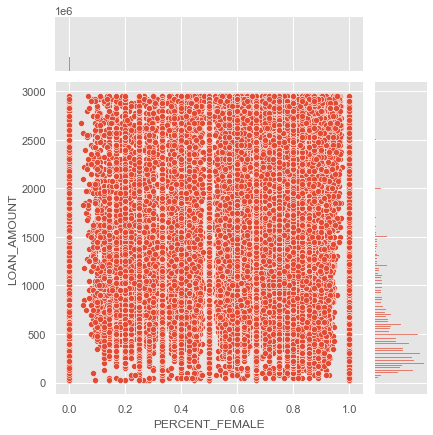

In [138]:
sns.jointplot(loan['PERCENT_FEMALE'], loan['LOAN_AMOUNT'])

In [ ]:
Total_LoanAmount = Loan_final['LOAN_AMOUNT'].sum()/10**6
Total_LoanAmount_Women = round((Total_LoanAmount*women/100),2)
Total_LoanAmount_Men = round((Total_LoanAmount - Total_LoanAmount_Women),2)

print('Kiva has disrbursed loan to ' + str(women) + '%  Women borrowers, Loan amount totalling to Million $ ' + str(Total_LoanAmount_Women) )
print('Kiva has disrbursed loan to ' + str(men) + '%  men borrowers, Loan amount totalling to Million $ ' + str(Total_LoanAmount_Men) )

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("loans.csv")

In [ ]:
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)


In [ ]:
your_list = []
with open('LOANS_USE.df', 'rb') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[0] for i in reader])





In [ ]:
# Generate a word cloud image
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Conclusions

We examine how we can predict loan gets funded or not with loan features. We cleaned, tarnsformed teh data and recoded variables for analysis. We explored the data with graphs. We used different models for classification and obtain good results. We find that most loans are being funded with probability morethan 95%. 
This suggests that rejection of loans are very low if teh borrower specify the requirement clearly as per the guidelines. We also conducted the thorough analysis of loan sector, laon gender, loan days, whcih gives us teh opinion that Kiva loan approval process are in line with the organisation mission & vision to reach out the under privilaged people across the globe esp under developed countries & reaching to remote location. Alos preference to women was found high compared to men.  Our prediction involved 5 models such as logistic regression, decision tree & random forest,Naive bayes, Neural Network assuming the lowet accuracy i,e 95%. error of 5 % is very much acceptable and random forest is best model with highest accuracy of 99.7 %.

# References

https://www.kiva.org/about/impact 

https://www.gsb.stanford.edu/gsb-box/route-download/349176

https://github.com/damitkwr/KivaExpiry 

https://www.linkedin.com/pulse/model-built-predict-whether-loan-applicant-default-david-ifeoluwa

https://www.kiva.global/global-impact-dashboard/

https://www.youtube.com/watch?v=om02_lChPHc

https://seaborn.pydata.org/examples/scatterplot_matrix.html

https://pandas.pydata.org/

https://www.w3schools.com/python

https://hastie.su.domains/ElemStatLearn/

https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea   
